In [1]:
import pandas as pd

In [2]:
from google.colab import files
car_sales_df= files.upload()

Saving car_sales_data.csv to car_sales_data.csv


In [4]:
type(car_sales_df)
car_sales_df = pd.read_csv('car_sales_data.csv')

In [5]:
sales = pd.DataFrame.from_dict(car_sales_df, orient='columns')
print(sales)
sales

      Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  
0       127300    3074  
1        5785

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [6]:
list(car_sales_df.columns)

['Manufacturer',
 'Model',
 'Engine size',
 'Fuel type',
 'Year of manufacture',
 'Mileage',
 'Price']

In [7]:
print(list(sales.columns))
list(sales.columns)
sales.columns

['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']


Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [8]:
car_sales_df.Manufacturer.value_counts()

,count
Manufacturer,
Ford,14959
VW,14913
Toyota,12554
BMW,4965
Porsche,2609


In [9]:
car_sales_df.groupby('Manufacturer')['Mileage'].mean()

,Mileage
Manufacturer,
BMW,112837.733333
Ford,112525.884819
Porsche,111638.253737
Toyota,111361.126494
VW,113462.092939


In [10]:
mileage_by_company = car_sales_df.groupby('Manufacturer')['Mileage'].mean().reset_index()
print(mileage_by_company)

  Manufacturer        Mileage
0          BMW  112837.733333
1         Ford  112525.884819
2      Porsche  111638.253737
3       Toyota  111361.126494
4           VW  113462.092939


In [11]:
mileage_by_company_name = car_sales_df.groupby(['Manufacturer','Model'])['Mileage'].mean().reset_index()
print(mileage_by_company_name)

   Manufacturer       Model        Mileage
0           BMW          M5  113930.555623
1           BMW          X3  112177.148897
2           BMW          Z4  112411.418839
3          Ford      Fiesta  112474.417868
4          Ford       Focus  114062.384043
5          Ford      Mondeo  111064.408857
6       Porsche  718 Cayman  113056.261822
7       Porsche         911  110986.150229
8       Porsche     Cayenne  110878.737931
9        Toyota       Prius  111654.215296
10       Toyota        RAV4  112339.802889
11       Toyota       Yaris  110035.545343
12           VW        Golf  112394.996832
13           VW      Passat  115020.703141
14           VW        Polo  113020.755809


In [12]:
mileage_comparison = mileage_by_company_name.merge(mileage_by_company, on='Manufacturer', how='outer')

In [13]:
mileage_comparison

,Manufacturer,Model,Mileage_x,Mileage_y
0,BMW,M5,113930.555623,112837.733333
1,BMW,X3,112177.148897,112837.733333
2,BMW,Z4,112411.418839,112837.733333
3,Ford,Fiesta,112474.417868,112525.884819
4,Ford,Focus,114062.384043,112525.884819
5,Ford,Mondeo,111064.408857,112525.884819
6,Porsche,718 Cayman,113056.261822,111638.253737
7,Porsche,911,110986.150229,111638.253737
8,Porsche,Cayenne,110878.737931,111638.253737
9,Toyota,Prius,111654.215296,111361.126494


In [14]:
import matplotlib.pyplot as plt
import seaborn as sn


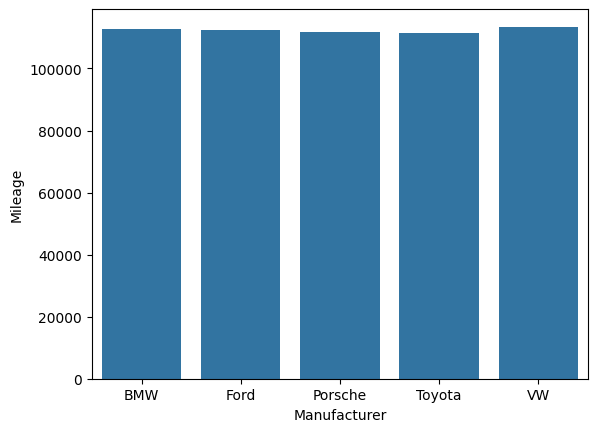

In [16]:
sn.barplot(x='Manufacturer',y='Mileage', data= mileage_by_company);

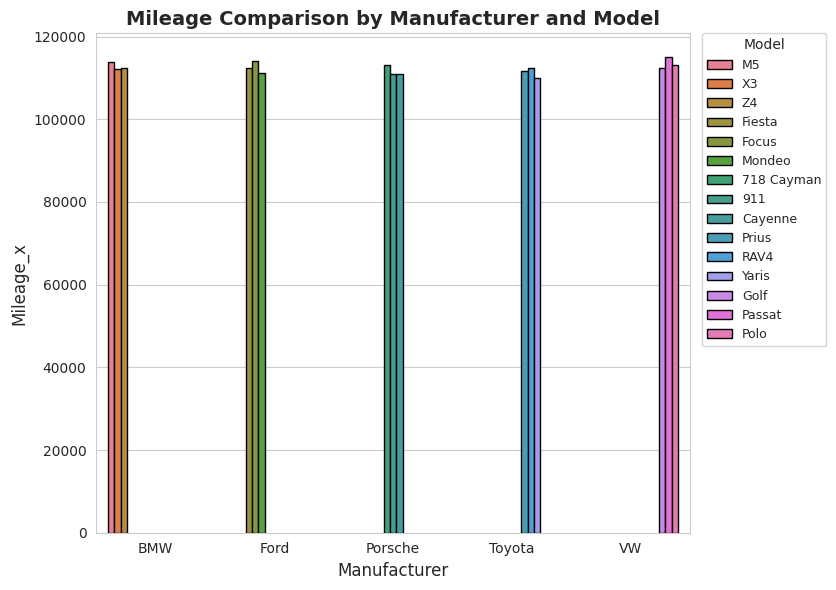

In [17]:


plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
sn.set_palette("tab10")

barplot = sn.barplot(x='Manufacturer',y='Mileage_x',hue='Model',data=mileage_comparison,edgecolor='black')

plt.title("Mileage Comparison by Manufacturer and Model", fontsize=14, fontweight='bold')
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Mileage_x", fontsize=12)

leg = plt.legend(title='Model',bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,fontsize=9,title_fontsize=10,frameon=True)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


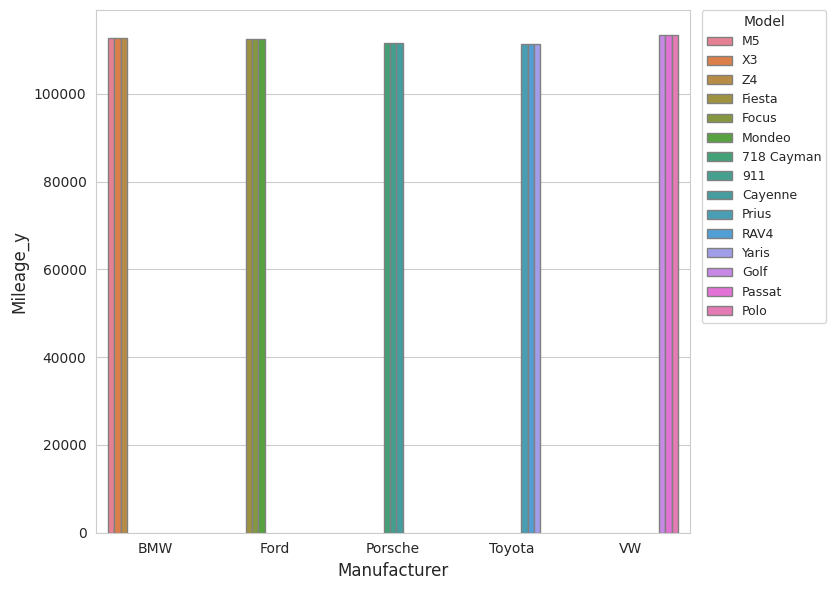

In [22]:


plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
sn.set_palette("tab10")
sn.barplot(x='Manufacturer', y='Mileage_y', hue='Model', data= mileage_comparison, edgecolor='grey')

plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Mileage_y", fontsize=12)

leg = plt.legend(title='Model',bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,fontsize=9,title_fontsize=10,frameon=True)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()



(array([2.5819e+04, 9.9270e+03, 5.8300e+03, 3.5750e+03, 2.0240e+03,
        1.1350e+03, 6.0800e+02, 3.2600e+02, 2.0200e+02, 1.2600e+02,
        1.0700e+02, 8.6000e+01, 5.8000e+01, 4.2000e+01, 3.7000e+01,
        4.0000e+01, 2.6000e+01, 1.4000e+01, 1.2000e+01, 6.0000e+00]),
 array([7.6000000e+01, 8.4762500e+03, 1.6876500e+04, 2.5276750e+04,
        3.3677000e+04, 4.2077250e+04, 5.0477500e+04, 5.8877750e+04,
        6.7278000e+04, 7.5678250e+04, 8.4078500e+04, 9.2478750e+04,
        1.0087900e+05, 1.0927925e+05, 1.1767950e+05, 1.2607975e+05,
        1.3448000e+05, 1.4288025e+05, 1.5128050e+05, 1.5968075e+05,
        1.6808100e+05]),
 <BarContainer object of 20 artists>)

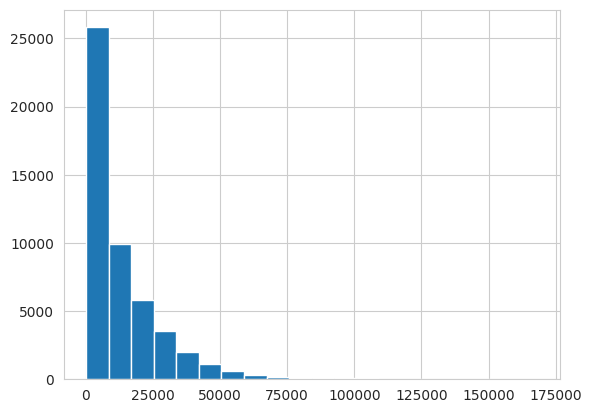

In [32]:
plt.hist(car_sales_df['Price'],bins=20)

(array([3.629e+03, 6.383e+03, 6.406e+03, 6.105e+03, 5.650e+03, 5.023e+03,
        4.391e+03, 3.547e+03, 2.900e+03, 2.149e+03, 1.537e+03, 9.620e+02,
        6.120e+02, 3.680e+02, 1.840e+02, 7.800e+01, 4.300e+01, 1.900e+01,
        1.100e+01, 3.000e+00]),
 array([   630.  ,  23275.35,  45920.7 ,  68566.05,  91211.4 , 113856.75,
        136502.1 , 159147.45, 181792.8 , 204438.15, 227083.5 , 249728.85,
        272374.2 , 295019.55, 317664.9 , 340310.25, 362955.6 , 385600.95,
        408246.3 , 430891.65, 453537.  ]),
 <BarContainer object of 20 artists>)

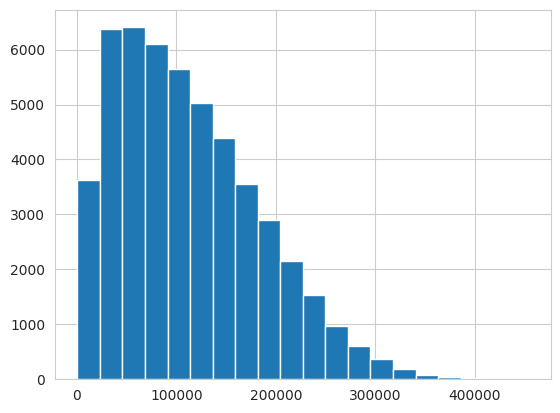

In [34]:
plt.hist(car_sales_df['Mileage'],bins=20)

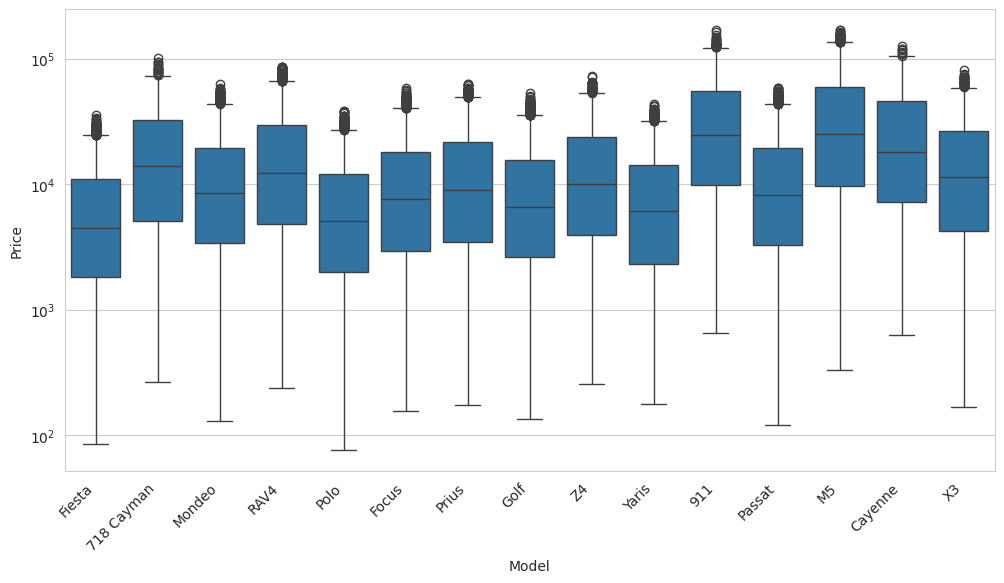

In [33]:
plt.figure(figsize=(12,6))
sn.boxplot(x='Model', y='Price', data=car_sales_df)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()

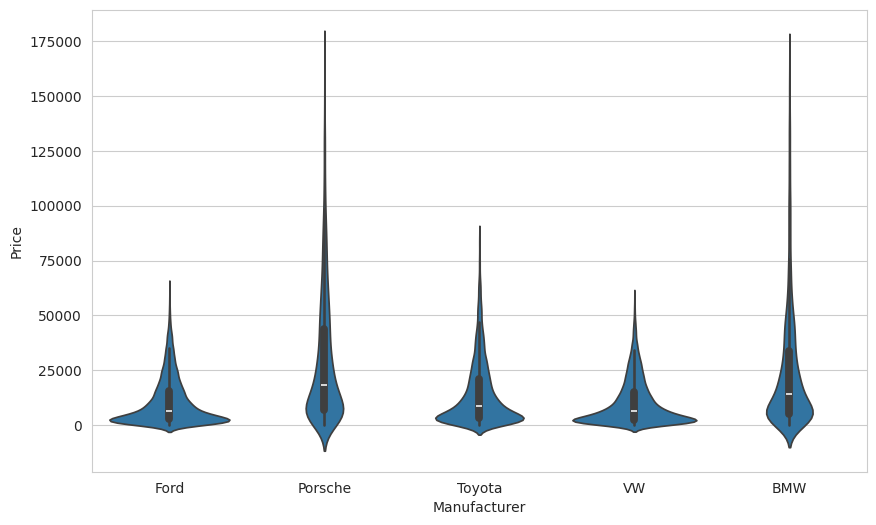

In [35]:
plt.figure(figsize=(10,6))
sn.violinplot(x='Manufacturer', y='Price', data=car_sales_df)
plt.show()

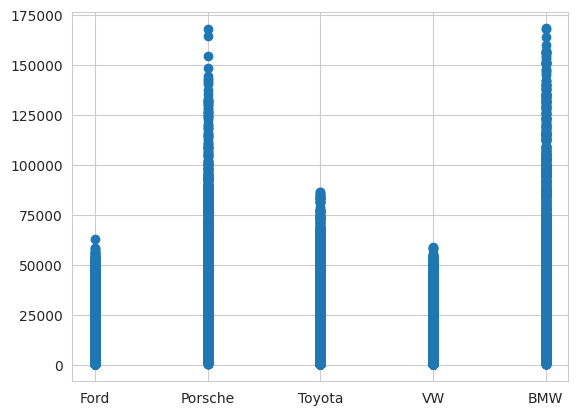

In [37]:
plt.scatter(x= 'Manufacturer' , y='Price', data=car_sales_df)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Fiesta'),
  Text(1, 0, '718 Cayman'),
  Text(2, 0, 'Mondeo'),
  Text(3, 0, 'RAV4'),
  Text(4, 0, 'Polo'),
  Text(5, 0, 'Focus'),
  Text(6, 0, 'Prius'),
  Text(7, 0, 'Golf'),
  Text(8, 0, 'Z4'),
  Text(9, 0, 'Yaris'),
  Text(10, 0, '911'),
  Text(11, 0, 'Passat'),
  Text(12, 0, 'M5'),
  Text(13, 0, 'Cayenne'),
  Text(14, 0, 'X3')])

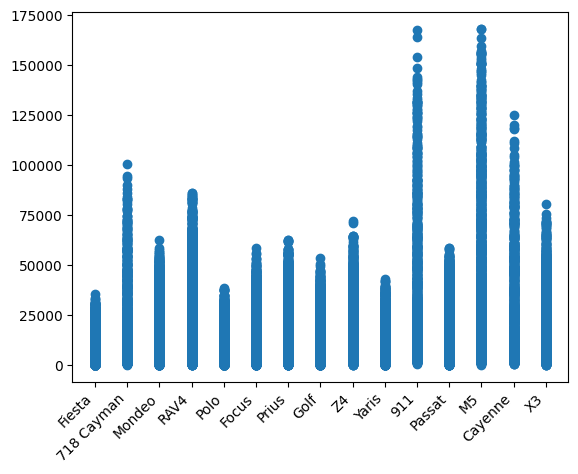

In [ ]:
plt.scatter(x=car_sales_df.Model , y=car_sales_df['Price'])
plt.xticks(rotation=45 , ha='right')


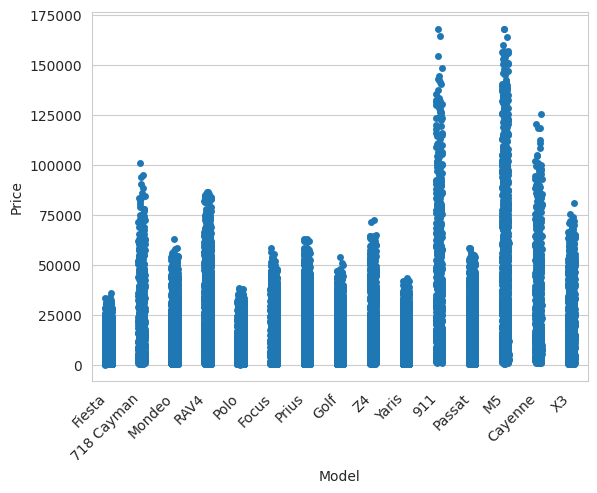

In [38]:
sn.stripplot(x='Model', y='Price', data=car_sales_df , jitter=True)
plt.xticks(rotation=45 , ha='right')
plt.show()